#                                        Loan application

In [1]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# data Analysis

In [3]:
df.shape
#Shape of the dataset

(614, 13)

In [4]:
df.info()
#Types of values in data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()
#Null values are present in dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.nunique()
#unique values in each columns..

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df.drop("Loan_ID",axis=1,inplace=True)
#we can see that the Loan_ID is just an unique number provided to the loan applicants
#which will have no impact on the prediction, hence we will consider dropping that column.

In [9]:
for i in df.columns:
    print('\n','__________________________________')
    print(df[i].value_counts())
#Checking the counts of values in each colmns.


 __________________________________
Male      489
Female    112
Name: Gender, dtype: int64

 __________________________________
Yes    398
No     213
Name: Married, dtype: int64

 __________________________________
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 __________________________________
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 __________________________________
No     500
Yes     82
Name: Self_Employed, dtype: int64

 __________________________________
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

 __________________________________
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

 __________________________________
120.0    20
110.0    17
100.0    15
16

<function matplotlib.pyplot.show(close=None, block=None)>

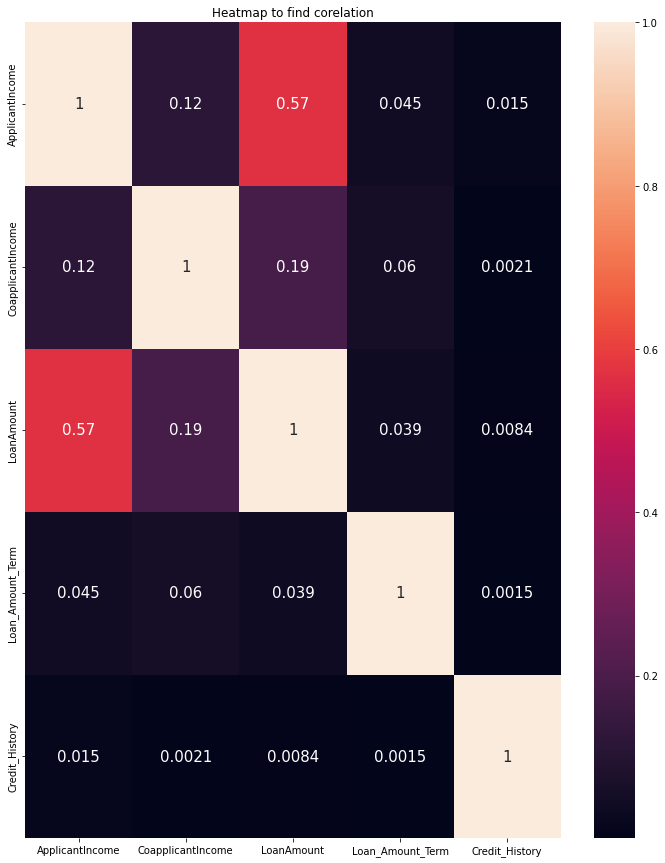

In [11]:
#Checking Corelation..
corr=df.corr().abs()
plt.figure(figsize=(12,15))
sns.heatmap(corr,annot=True,annot_kws={'size':15})
plt.title("Heatmap to find corelation")
plt.show

In [12]:
#Filling null values for categorical colmns using mode method..
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [13]:
#Filling null values for num_colmn using median method..
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [15]:
df.isnull().sum()
#There are no null values present in dataset..

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.describe()
#Information about numerival values..

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Visualisation Techniques

In [ ]:
#CATEGORICAL COLUMNS:

Male      502
Female    112
Name: Gender, dtype: int64


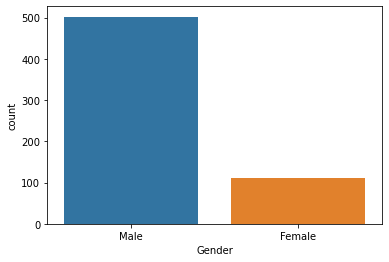

In [17]:
#Gender
print(df["Gender"].value_counts())
sns.countplot(df["Gender"])
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


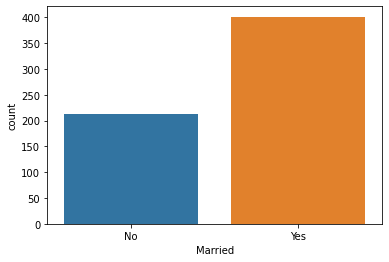

In [18]:
#Married
print(df["Married"].value_counts())
sns.countplot(df["Married"])
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


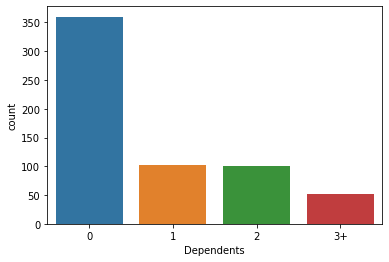

In [19]:
#Dependents
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


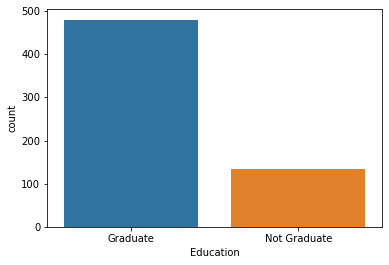

In [20]:
# Education
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


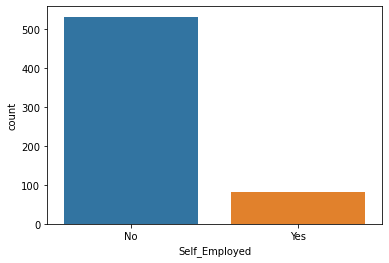

In [21]:
#Self_Employed
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


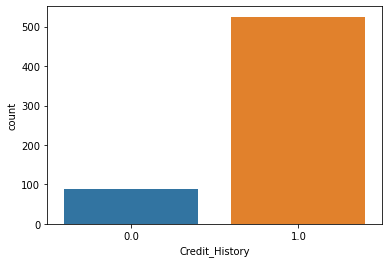

In [22]:
# Credit_History
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

Y    422
N    192
Name: Loan_Status, dtype: int64


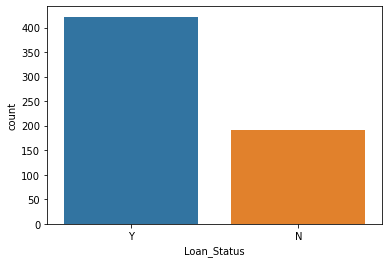

In [25]:
# Visualizing the Target..
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

# Skewness

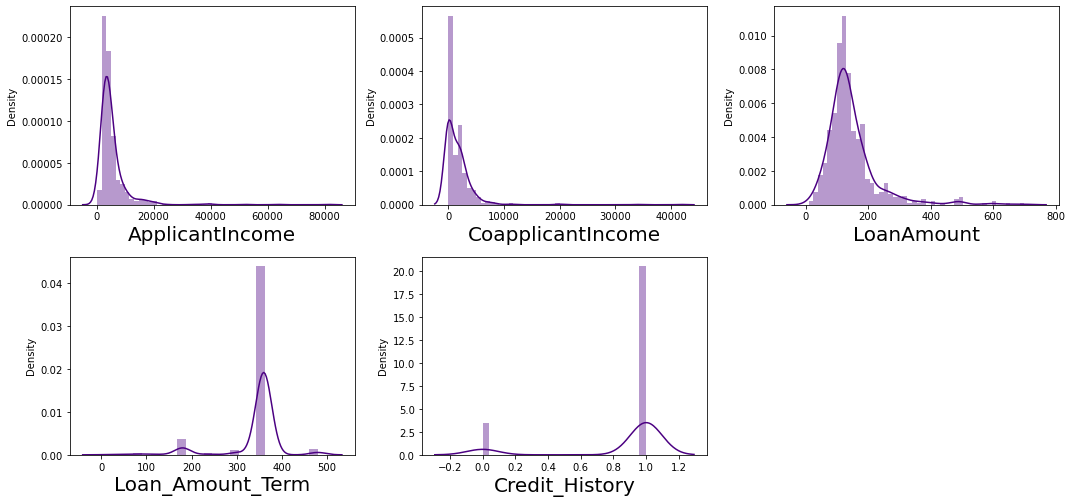

In [24]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for column in df[columns]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

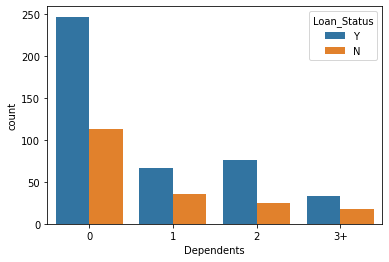

In [26]:
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


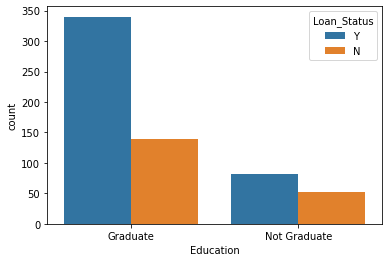

In [27]:
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


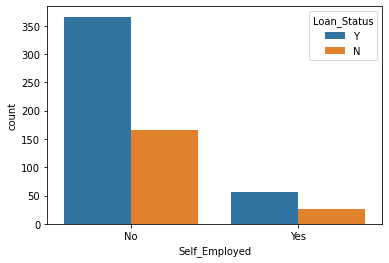

In [29]:
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


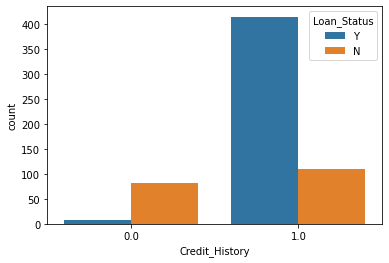

In [30]:
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


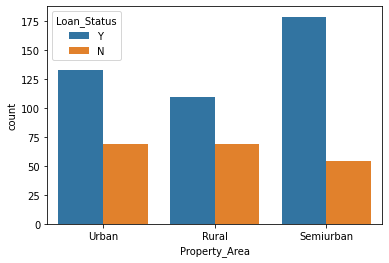

In [33]:
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"])
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


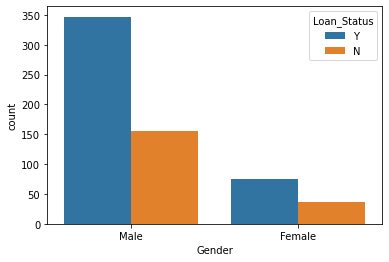

In [34]:
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


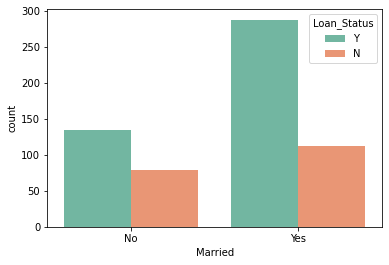

In [35]:
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Set2")
plt.show()

# DATA Preprocessing

# outliers

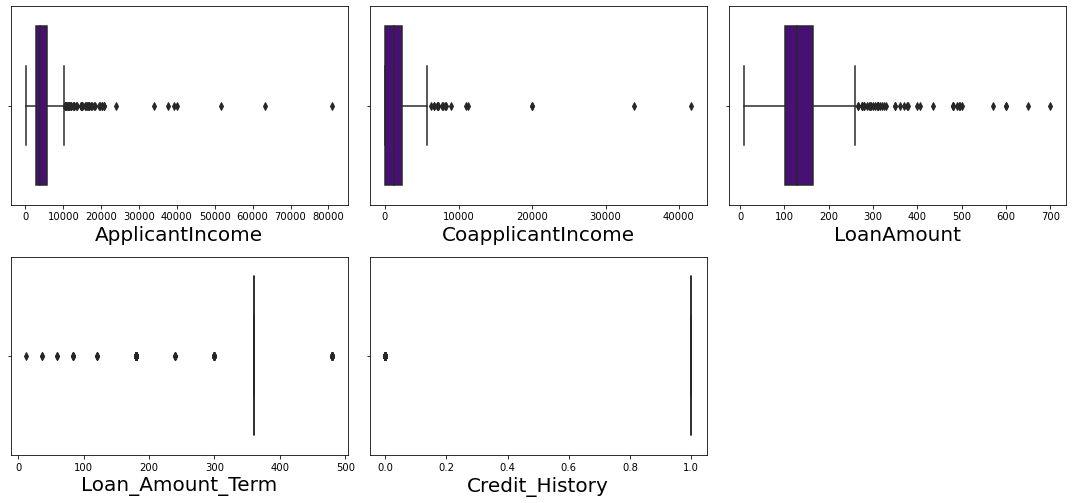

In [37]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for column in df[columns]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Removing Outliers..

In [38]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


In [40]:
df1 = df[(z<3).all(axis=1)] 
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [41]:
df1.shape

(577, 12)

In [42]:
df.shape

(614, 12)

In [43]:
(df.shape[0]-df1.shape[0])/df.shape[0]*100

6.026058631921824

In [44]:
df1.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

# Power trans method to remov skewness..

In [45]:
from sklearn.preprocessing import power_transform

In [46]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
pow_mthd = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [47]:
df1[skew] = pow_mthd.fit_transform(df1[skew].values)
df1[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [48]:
df1.skew()
#We reduced the skewness..

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

# Encoding

In [49]:
cat_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
lab_enc=LabelEncoder()
df1[cat_col]= df1[cat_col].apply(lab_enc.fit_transform)
df1[cat_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [53]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


<function matplotlib.pyplot.show(close=None, block=None)>

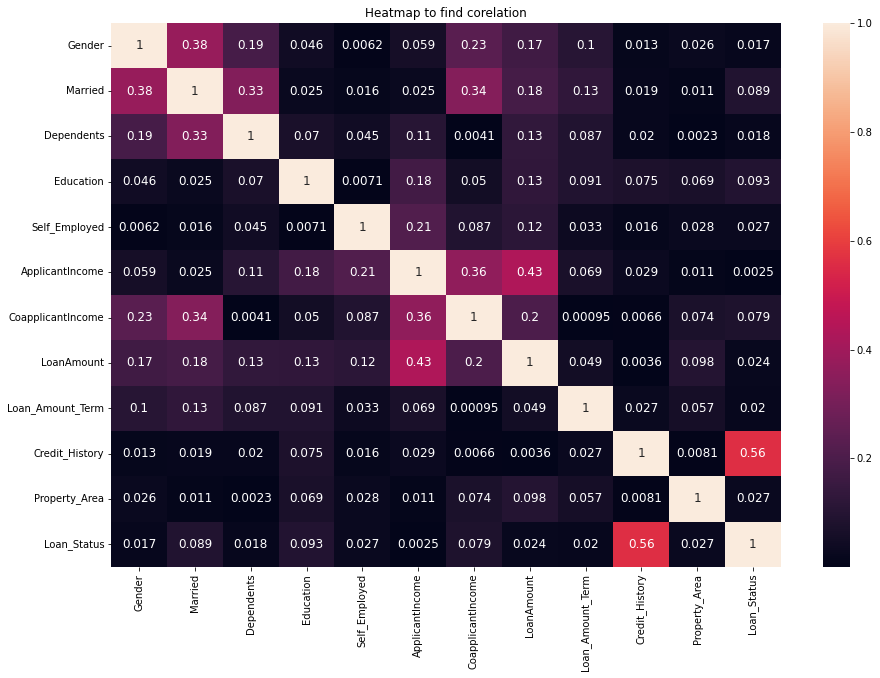

In [56]:
corr=df1.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.yticks(rotation=0)
plt.show

In [58]:
x = df1.drop("Loan_Status", axis=1)
y = df1["Loan_Status"]

In [60]:
x.shape,y.shape

((577, 11), (577,))

# StandardScaler

In [61]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


# VIF

In [64]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X,i) for i in range(X.shape[1])]

In [65]:
vif

,vif
0,1.222762
1,1.416724
2,1.168953
3,1.070347
4,1.052465
5,1.761311
6,1.589265
7,1.556424
8,1.056624
9,1.009648


In [67]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


# ModelBuilding

# RandomForestClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=.30, random_state=i)
    RAN=RandomForestClassifier()
    RAN.fit(x_train,y_train)
    pred=RAN.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8563218390804598  on Random_state  52


In [72]:
print(cross_val_score(RAN,X,y,cv=5).mean())

0.7937931034482759


# test and train

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# LogisticRegression

In [75]:
from sklearn.linear_model import LogisticRegression

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [78]:
log = LogisticRegression()
log.fit(x_train,y_train)
pred_log = log.predict(x_test)
print(accuracy_score(y_test, pred_log))
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test,pred_log))

0.8448275862068966
[[ 25  27]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65        52
           1       0.82      1.00      0.90       122

    accuracy                           0.84       174
   macro avg       0.91      0.74      0.77       174
weighted avg       0.87      0.84      0.83       174



In [79]:
print(cross_val_score(log,X,y,cv=5).mean())

0.8180809595202397


# DecisionTreeClassifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test, pred_DT))
print(confusion_matrix(y_test, pred_DT))
print(classification_report(y_test,pred_DT))

0.7701149425287356
[[ 34  18]
 [ 22 100]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        52
           1       0.85      0.82      0.83       122

    accuracy                           0.77       174
   macro avg       0.73      0.74      0.73       174
weighted avg       0.78      0.77      0.77       174



In [84]:
print(cross_val_score(DT,X,y,cv=5).mean())

0.7313943028485758


# RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
RAN=RandomForestClassifier()
RAN.fit(x_train, y_train)
pred_RAN=RAN.predict(x_test)
print(accuracy_score(y_test, pred_RAN))
print(confusion_matrix(y_test, pred_RAN))
print(classification_report(y_test,pred_RAN))

0.8448275862068966
[[ 28  24]
 [  3 119]]
              precision    recall  f1-score   support

           0       0.90      0.54      0.67        52
           1       0.83      0.98      0.90       122

    accuracy                           0.84       174
   macro avg       0.87      0.76      0.79       174
weighted avg       0.85      0.84      0.83       174



In [87]:
print(cross_val_score(RAN,X,y,cv=5).mean())

0.7990254872563718


# KNeighborsClassifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8275862068965517
[[ 26  26]
 [  4 118]]
              precision    recall  f1-score   support

           0       0.87      0.50      0.63        52
           1       0.82      0.97      0.89       122

    accuracy                           0.83       174
   macro avg       0.84      0.73      0.76       174
weighted avg       0.83      0.83      0.81       174



In [91]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7903448275862068


# AdaBoostClassifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
ADA=AdaBoostClassifier()
ADA.fit(x_train, y_train)
pred_ADA=ADA.predict(x_test)
print(accuracy_score(y_test, pred_ADA))
print(confusion_matrix(y_test, pred_ADA))
print(classification_report(y_test,pred_ADA))

0.8448275862068966
[[ 26  26]
 [  1 121]]
              precision    recall  f1-score   support

           0       0.96      0.50      0.66        52
           1       0.82      0.99      0.90       122

    accuracy                           0.84       174
   macro avg       0.89      0.75      0.78       174
weighted avg       0.86      0.84      0.83       174



In [95]:
print(cross_val_score(ADA,X,y,cv=5).mean())

0.7834632683658171


# HyperParameterTuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [98]:
parameters = {'criterion':["gini","entropy"],
              'max_features':['auto','sqrt', 'log2'],
              'max_depth':[10,20,30,40,50],
              'splitter':['best','random']}

In [100]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [101]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [102]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'splitter': 'random'}

In [103]:
status = DecisionTreeClassifier(criterion='gini', max_depth=20, max_features='sqrt',splitter='random')
status.fit(x_train, y_train)
pred = status.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

75.86206896551724


# AUC ROC Curve

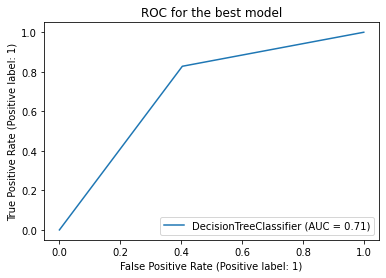

In [105]:
from sklearn.metrics import plot_roc_curve 
plot_roc_curve(status, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Conclusion

#                                               THANK YOU

# Saving Model

In [ ]:
import joblib
joblib.dump(loan_status,"Loan_Application.pkl")